# Project: Investigate the "No-show appointments " Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this report, a dataset collecting over one hundred thousand of medical appointment data is briefly viewed and analyzed. The "No-show appointments" dataset focuses on the clients' gender, age, scholarship and so on, from which a large quantity of information can be drawn. Therefore, there are three questions discussed in the report:

Which gender is more likely to show in the appointments?

Is there any trend between age and no-show counts

Is there any difference between Diabetes and Alcoholism in No-show counts?

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [61]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [62]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
df.shape

(110527, 14)

In [64]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Check and clean nulls, duplicates, unexpected values.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [66]:
df['AppointmentID'].duplicated().sum()

0

In [77]:
#A function to find unique values in a column:
def uniqueValues(columnName):
    unVal = set()
    for data in df[columnName]:
        unVal.add(data)
        
    return unVal

In [68]:
uniqueValues('Age')

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115}

In [69]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [70]:
df.drop(index=99832,inplace=True)

In [71]:
df.shape

(110526, 14)

## Summary of Data Wrangling
There is no null or duplicated value in the dataset. However, there exists one row where the age of patient is '-1', which is unexpected. Therefore I dropped it and the dataset is cleaned.

<a id='eda'></a>
## Exploratory Data Analysis
### Which gender appears to be more in the appointments?

In [72]:
df.replace({'Yes':1,'No':0},inplace = True)

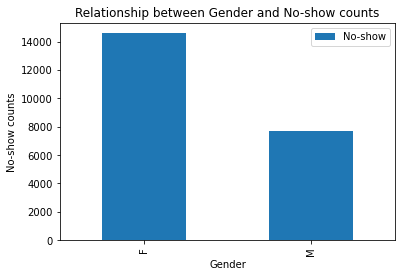

In [73]:
df_01=df.groupby(['Gender'],as_index=False).sum()
df_01.plot(x='Gender',y='No-show',kind='bar')
plt.xlabel('Gender')
plt.ylabel('No-show counts')
plt.title('Relationship between Gender and No-show counts');

From the barchart above, there are more female clients that do not show in the appointments. Therefore, male clients appear to be more in the appointments.

### Is there any trend between age and no-show counts

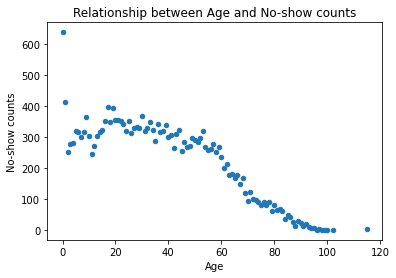

In [74]:
df_02=df.groupby(['Age'],as_index=False).sum()
df_02.plot(x='Age',y='No-show',kind='scatter')
plt.xlabel('Age')
plt.ylabel('No-show counts')
plt.title('Relationship between Age and No-show counts');

From the scatter graph above, an overall decreasing trend can be seen, where the trend appears to be gentle before 60 years old but sharp after that. 

### Is there any difference between Diabetes and Alcoholism in No-show counts?

In [75]:
df_03=df.groupby(['Diabetes',],as_index=False).sum()
df_04=df.groupby(['Alcoholism'],as_index=False).sum()

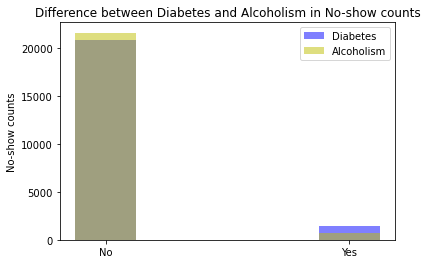

In [76]:
plt.bar(df_03['Diabetes'], df_03['No-show'],alpha=0.5, color = 'b', width = 0.25, label='Diabetes')
plt.bar(df_04['Alcoholism'], df_04['No-show'], alpha=0.5, color = 'y', width = 0.25, label='Alcoholism')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('No-show counts')
plt.title('Difference between Diabetes and Alcoholism in No-show counts')
plt.legend();

From the barchart above, there are simillar counts of no-show clients with no diabetes or alcoholism, however the count is different when it comes to the prescence of diabetes, alcoholism. In addition, there is huge gap of no-show counts between the patients have diabetes alcoholism and the patients who do not.

<a id='conclusions'></a>
## Conclusions

>**Results:** In conclusion: 
>    
   >1.From the bar-chart, there are about 6000 more male clients showing in the appointment. 
>    
   >2.From the scatter plot, as age increasing, the overall trend of no-show counts seems to decrease.  
>    
   >3.From the last graph, the no-show counts are similar when there is no diabetes or alcoholism. but different with the presence of them.

>**Limits:**There are two limitations found during the analysis:
>    
   >1.There is no detailed trend between 'age' and 'No-show counts' can be explained without using regression.
>    
   >2.Because of the huge gap of no-show counts between the patients have diabetes alcoholism and the patients who do not in the third graph, we cannot see the difference of no-show counts between patients who have diabetes and alcoholism.